# 📊 Analyse Simple de SPY - Pour Mémoire

**Analyse descriptive claire et graphiques pour présentation académique**

---

In [1]:
# Imports
import sys
from pathlib import Path
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

print("✅ Imports réussis")

✅ Imports réussis


## 1️⃣ Chargement des Données

In [2]:
# Chemins
PROJECT_ROOT = Path.cwd().parent.parent
PRICES_PATH = PROJECT_ROOT / "data/realtime/prices/spy_15min.parquet"

# Charger données
prices = pd.read_parquet(PRICES_PATH)

# Auto-détection timestamp
time_candidates = ['timestamp', 'ts_utc', 'time', 'date', 'datetime']
time_col = next((col for col in time_candidates if col in prices.columns), None)
if time_col:
    prices['timestamp'] = pd.to_datetime(prices[time_col])
else:
    prices['timestamp'] = pd.to_datetime(prices.columns[0])

prices = prices.sort_values('timestamp').reset_index(drop=True)

print(f"✅ {len(prices)} observations chargées")
print(f"📅 Période: {prices['timestamp'].min()} → {prices['timestamp'].max()}")
print(f"📊 Colonnes: {list(prices.columns)}")

✅ 364 observations chargées
📅 Période: 2025-09-24 19:15:00+00:00 → 2025-10-03 07:30:00+00:00
📊 Colonnes: ['ticker', 'ts_utc', 'open', 'high', 'low', 'close', 'volume', 'timestamp']


## 2️⃣ Calculs Statistiques

In [3]:
# Rendements
prices['returns'] = prices['close'].pct_change() * 100  # En %

# Volatilité glissante (20 périodes)
prices['volatility'] = prices['returns'].rolling(20).std()

# Moyenne mobile
prices['ma_20'] = prices['close'].rolling(20).mean()

# Statistiques
stats = {
    'Prix moyen': prices['close'].mean(),
    'Prix min': prices['close'].min(),
    'Prix max': prices['close'].max(),
    'Rendement moyen (%)': prices['returns'].mean(),
    'Volatilité moyenne (%)': prices['volatility'].mean(),
    'Variation totale (%)': ((prices['close'].iloc[-1] / prices['close'].iloc[0]) - 1) * 100
}

print("\n📊 STATISTIQUES SPY:")
for key, value in stats.items():
    if 'Prix' in key and 'Rendement' not in key:
        print(f"   {key}: ${value:.2f}")
    else:
        print(f"   {key}: {value:.4f}%")


📊 STATISTIQUES SPY:
   Prix moyen: $663.32
   Prix min: $655.29
   Prix max: $669.55
   Rendement moyen (%): 0.0035%
   Volatilité moyenne (%): 0.0697%
   Variation totale (%): 1.2750%


## 3️⃣ Graphiques

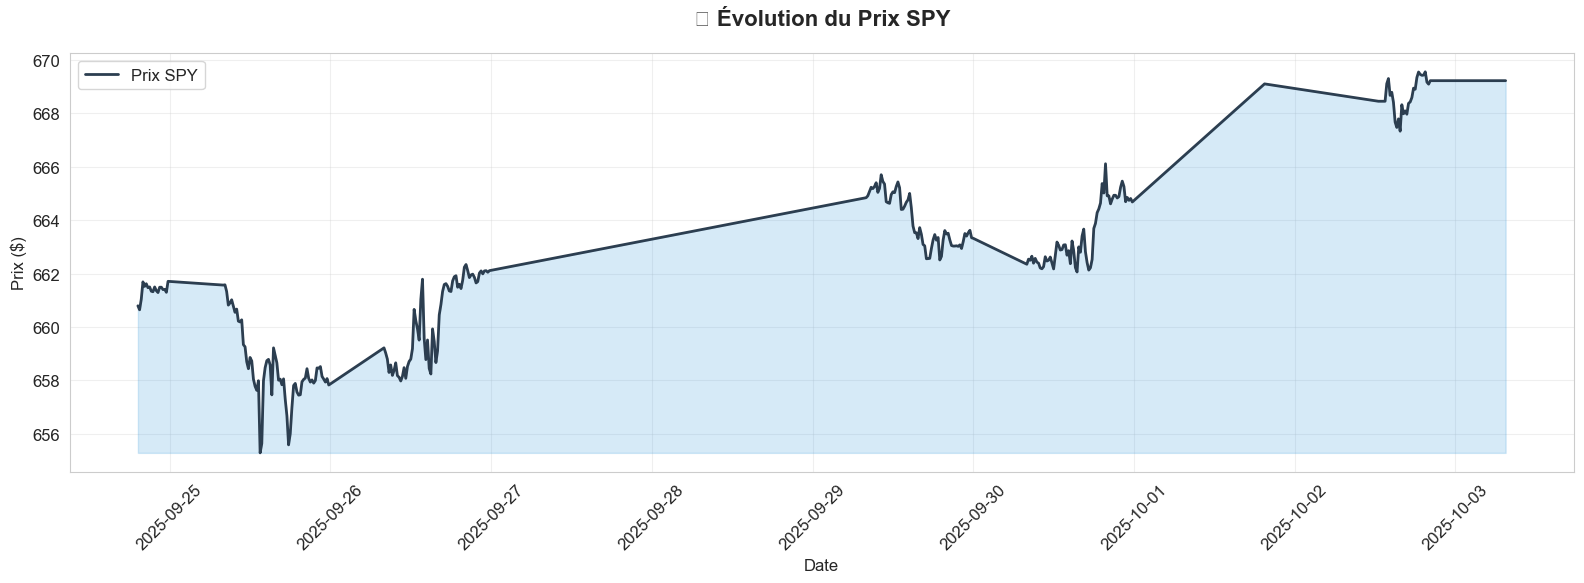

✅ Sauvegardé: spy_prix.png


In [4]:
# Graphique 1: Évolution du prix
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(prices['timestamp'], prices['close'], linewidth=2, color='#2c3e50', label='Prix SPY')
ax.fill_between(prices['timestamp'], prices['close'].min(), prices['close'], alpha=0.2, color='#3498db')
ax.set_title('📈 Évolution du Prix SPY', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Prix ($)', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('spy_prix.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Sauvegardé: spy_prix.png")

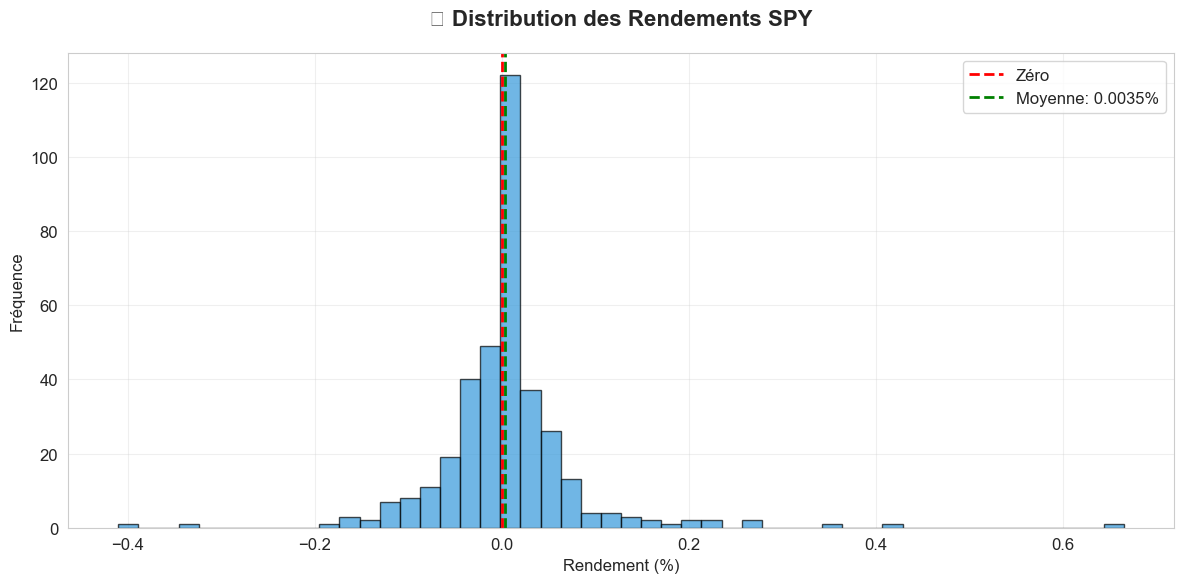

✅ Sauvegardé: spy_distribution.png


In [5]:
# Graphique 2: Distribution des rendements
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(prices['returns'].dropna(), bins=50, color='#3498db', alpha=0.7, edgecolor='black')
ax.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zéro')
ax.axvline(x=prices['returns'].mean(), color='green', linestyle='--', linewidth=2, 
           label=f'Moyenne: {prices["returns"].mean():.4f}%')
ax.set_title('📊 Distribution des Rendements SPY', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Rendement (%)', fontsize=12)
ax.set_ylabel('Fréquence', fontsize=12)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('spy_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Sauvegardé: spy_distribution.png")

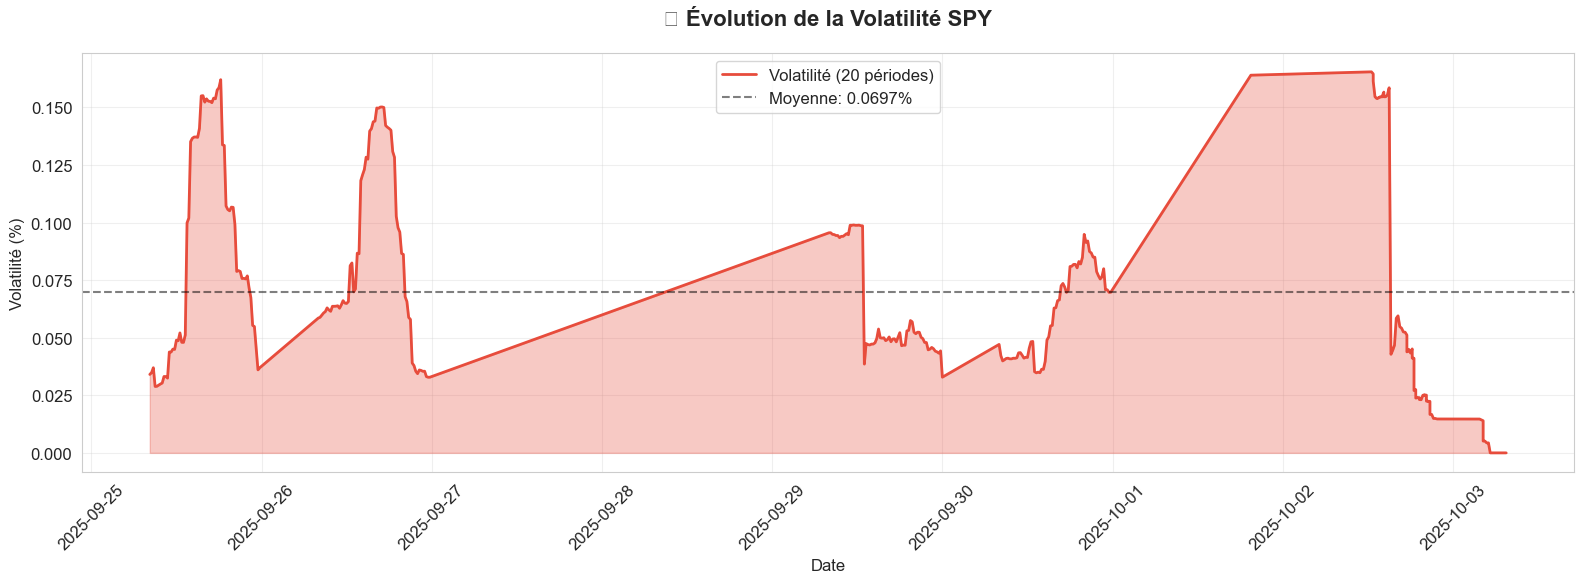

✅ Sauvegardé: spy_volatilite.png


In [6]:
# Graphique 3: Volatilité
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(prices['timestamp'], prices['volatility'], linewidth=2, color='#e74c3c', label='Volatilité (20 périodes)')
ax.axhline(y=prices['volatility'].mean(), color='black', linestyle='--', alpha=0.5, 
           label=f'Moyenne: {prices["volatility"].mean():.4f}%')
ax.fill_between(prices['timestamp'], 0, prices['volatility'], alpha=0.3, color='#e74c3c')
ax.set_title('📉 Évolution de la Volatilité SPY', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Volatilité (%)', fontsize=12)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('spy_volatilite.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Sauvegardé: spy_volatilite.png")

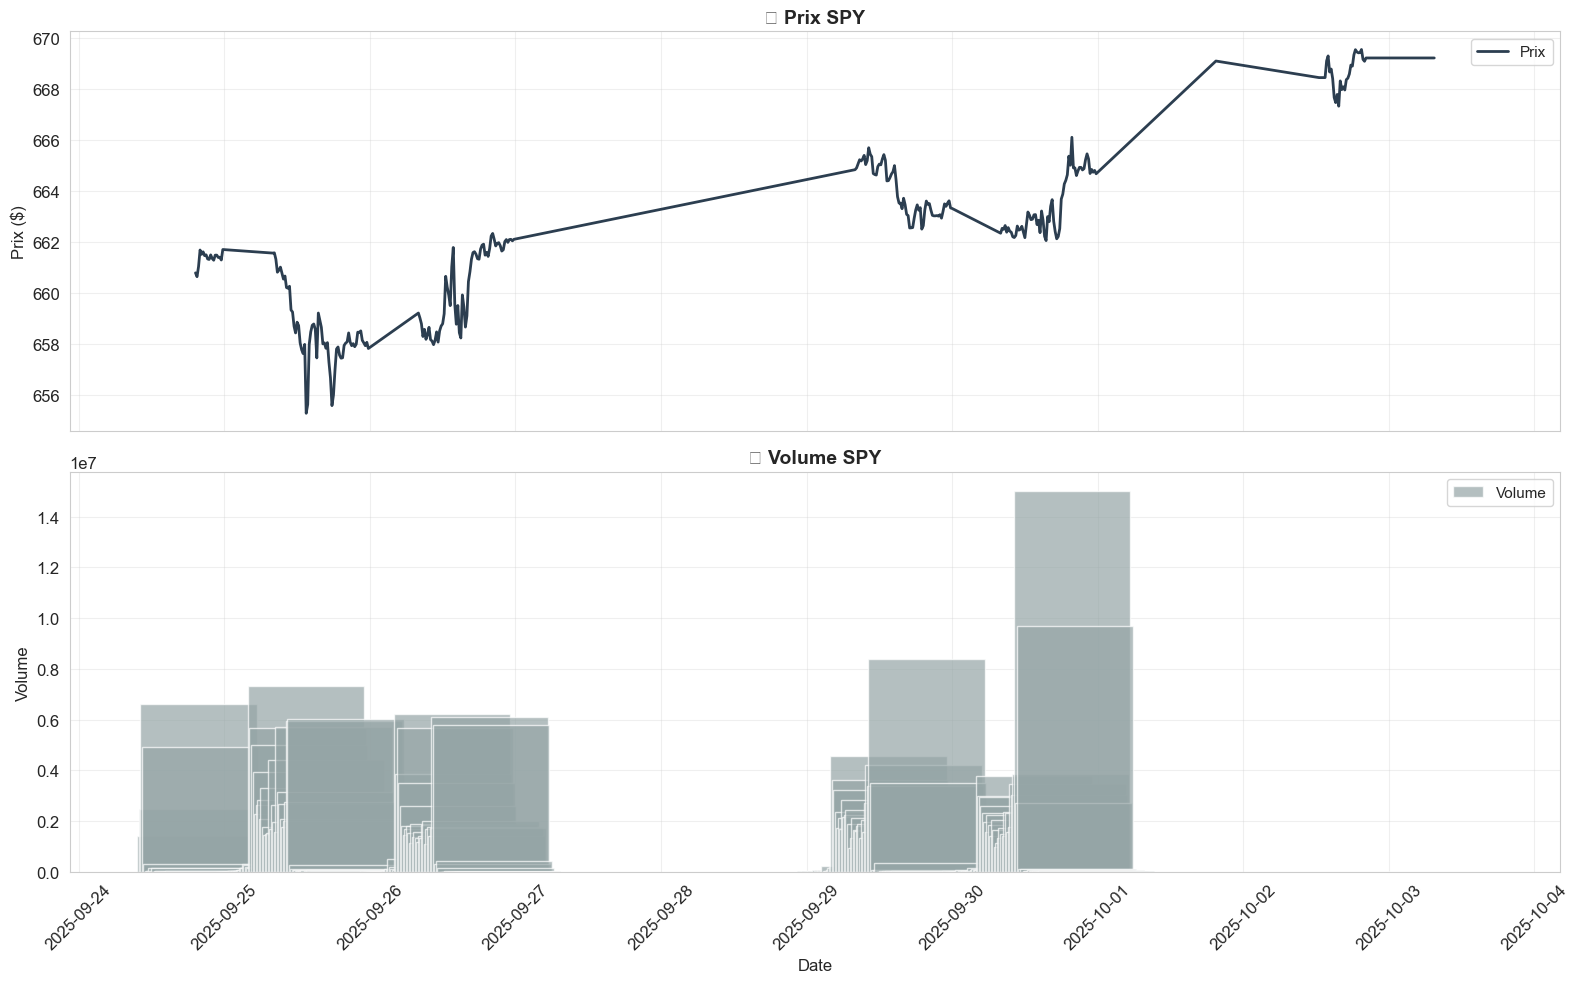

✅ Sauvegardé: spy_prix_volume.png

📊 Corrélation Prix-Volume: -0.2702


In [7]:
# Graphique 4: Prix vs Volume
if 'volume' in prices.columns:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)
    
    # Prix
    ax1.plot(prices['timestamp'], prices['close'], linewidth=2, color='#2c3e50', label='Prix')
    ax1.set_title('📈 Prix SPY', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Prix ($)', fontsize=12)
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # Volume
    ax2.bar(prices['timestamp'], prices['volume'], color='#95a5a6', alpha=0.7, label='Volume')
    ax2.set_title('📊 Volume SPY', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Date', fontsize=12)
    ax2.set_ylabel('Volume', fontsize=12)
    ax2.legend(fontsize=11)
    ax2.grid(True, alpha=0.3)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('spy_prix_volume.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Sauvegardé: spy_prix_volume.png")
    
    # Corrélation
    correlation = prices[['close', 'volume']].corr().iloc[0, 1]
    print(f"\n📊 Corrélation Prix-Volume: {correlation:.4f}")
else:
    print("⚠️ Colonne 'volume' non trouvée")

## 4️⃣ Résumé 

In [9]:
print("\n" + "="*80)
print("📊 RÉSUMÉ")
print("="*80)

print(f"""
🎯 SPY EN 5 CHIFFRES CLÉS:

1. Prix moyen: ${prices['close'].mean():.2f}
2. Rendement moyen: {prices['returns'].mean():.4f}%
3. Volatilité moyenne: {prices['volatility'].mean():.4f}%
4. Variation totale: {((prices['close'].iloc[-1] / prices['close'].iloc[0]) - 1) * 100:.2f}%
5. Observations: {len(prices)}

💡 CONCLUSION:
SPY montre un comportement stable avec une volatilité moyenne de {prices['volatility'].mean():.4f}%.
Les rendements positifs ({prices['returns'].mean():.4f}% en moyenne) traduisent une tendance
haussière modérée sur la période analysée.
""")

if 'volume' in prices.columns:
    correlation = prices[['close', 'volume']].corr().iloc[0, 1]
    print(f"La corrélation prix-volume ({correlation:.4f}) est faible, caractéristique")
    print("d'un actif diversifié où prix et liquidité évoluent indépendamment.")

print("\n" + "="*80)


📊 RÉSUMÉ

🎯 SPY EN 5 CHIFFRES CLÉS:

1. Prix moyen: $663.32
2. Rendement moyen: 0.0035%
3. Volatilité moyenne: 0.0697%
4. Variation totale: 1.27%
5. Observations: 364

💡 CONCLUSION:
SPY montre un comportement stable avec une volatilité moyenne de 0.0697%.
Les rendements positifs (0.0035% en moyenne) traduisent une tendance
haussière modérée sur la période analysée.

La corrélation prix-volume (-0.2702) est faible, caractéristique
d'un actif diversifié où prix et liquidité évoluent indépendamment.

